<a href="https://colab.research.google.com/github/nishannorunobi/linux_ge/blob/main/LinuxFileSystemGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# prompt: print hello world in python

print("Hello World!")


Hello World!


In [118]:
pip install node2vec


In [119]:
pip install network

In [120]:
pip install pydot

In [121]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

In [122]:
G = nx.Graph()

In [123]:
edgelist = [
    ("/", "home"),
    ("/", "bin"),
    ("/", "lib"),
    ("/", "boot"),
    ("/", "var"),
    ("/", "usr"),
    ("/", "dev"),
    ("/", "proc"),
    ("/", "etc")
]

edgelist = edgelist + [
    ("etc", "group"),
    ("etc", "hosts"),
    ("etc", "passwd")
]

edgelist = edgelist + [
    ("home", "user1"),
    ("home", "user2"),
    ("home", "user3")
]

edgelist = edgelist + [
    ("dev", "sda"),
    ("dev", "hda"),
    ("dev", "st0")
]

G.add_edges_from(edgelist)
#G.add_edge('home','user1')
#G.add_edge('home','user2')

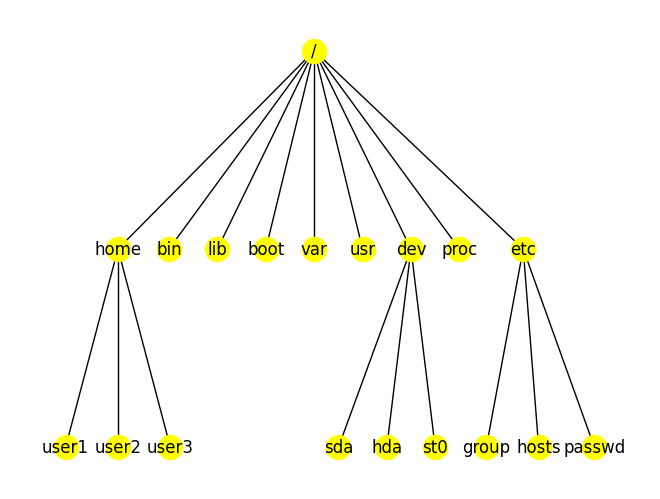

In [124]:

#T = nx.balanced_tree(2, 5)

pos = graphviz_layout(G, prog="dot")
nx.draw(G,pos, with_labels = True,node_color=['yellow'])

plt.show()

In [125]:
node2vec = Node2Vec(G, dimensions=64, walk_length=4, num_walks=50, workers=2)


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

In [126]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)
embeddings = {node: model.wv[node] for node in G.nodes()}

In [127]:
print("Embedding for Node 0:", embeddings['/'])

Embedding for Node 0: [-0.00440856  0.00117414  0.03057131  0.02548589 -0.02447741 -0.02847461
  0.00922651  0.02541828 -0.0074576  -0.01795965  0.03560177  0.00089955
 -0.00239185  0.01233191 -0.02258756 -0.01068153 -0.00276852  0.00914762
 -0.01755909 -0.0093561   0.02365009  0.01273729  0.0349517  -0.00400234
  0.01193587  0.01252712 -0.01525617  0.01384476 -0.02133841 -0.01519486
 -0.02100642 -0.00653487  0.00513187 -0.02651642  0.00396251  0.0011405
  0.01196155 -0.00675411  0.02217363 -0.00842051 -0.01496297  0.01853998
 -0.02853519 -0.02740109  0.00300265 -0.00836181 -0.0181719   0.01513494
  0.00399858  0.01637928 -0.00925879  0.01518715 -0.00754843  0.0182253
  0.03119977 -0.00835978  0.01532161 -0.02649001 -0.0028088   0.01418331
 -0.00270418 -0.00876193 -0.01630454 -0.01786917]


In [128]:
embedding1 = embeddings['/']
embedding2 = embeddings['home']
embedding3 = embeddings['sda']

magnitude1 = np.linalg.norm(embedding1)
magnitude2 = np.linalg.norm(embedding2)
magnitude3 = np.linalg.norm(embedding3)


close_node_prod = np.dot(embedding1, embedding2)
remote_node_prod = np.dot(embedding1, embedding3)


cosine_similarity_high = close_node_prod / (magnitude1 * magnitude2)
cosine_similarity_low = remote_node_prod / (magnitude1 * magnitude3)

print("High Cosine Similarity:", cosine_similarity_high)
print("Low Cosine Similarity:", cosine_similarity_low)

High Cosine Similarity: 0.5843842
Low Cosine Similarity: 0.22416043
